In [1]:
plt.style.use('bmh')
# plt.style.use('ggplot')
# plt.style.use('seaborn')
# plt.style.use('default')
# plt.style.use('fivethirtyeight')

### Mainheatcont description

#### 1. Read datasets

In [2]:
# Read clean dataset
feats = [
    'Property_UPRN',
    'Current energy efficiency rating',
    'Total current energy costs over 3 years (£)',
    'CO2 Emissions Current Per Floor Area (kg.CO2/m²/yr)'
]
df0 = pd.read_csv('data/data_clean.csv')[feats]
# create rating
df0['CO2_rating'] = pd.qcut(df0[feats[-1]], q = 5, labels = range(1,6)).astype(int)
df0['CO2_rating'] = 6 - df0.CO2_rating
display(df0.CO2_rating.value_counts().sort_index())

1    36938
2    34265
3    37728
4    37016
5    39092
Name: CO2_rating, dtype: int64

In [3]:
# read preprocessed dataset
df1 = pd.read_csv('data/descriptions/MAINHEATCONT_DESCRIPTION.csv', sep = '|')
# ratings convertion and merge with initial dataset
dict_repl1 = {
    'very poor': 1,
    'poor': 2,
    'average': 3,
    'good': 4,
    'very good': 5,
}
df1['Mainheatcont_rating'] = df1['MAINHEATC_ENERGY_EFF'].str.lower().map(dict_repl1)
df1 = df1.merge(df0, on = 'Property_UPRN', how = 'left')
df1['Total_rating'] = (df1.Mainheatcont_rating + df1.CO2_rating)/2
print(df1.shape)
display(df1.Total_rating.value_counts().sort_index())

(185954, 9)


1.00     1415
1.50     8386
2.00    12918
2.50    28545
3.00    31692
3.50    35038
4.00    30946
4.50    18546
5.00    18468
Name: Total_rating, dtype: int64

#### 2. Data cleaning

In [4]:
df1.MAINHEATCONT_DESCRIPTION.value_counts().sort_index().to_dict()

{'2207 Time and temperature zone control': 130,
 'Appliance thermostats': 3254,
 'Automatic charge control': 2263,
 'Charging system linked to use of community heating, TRVs': 291,
 'Charging system linked to use of community heating, programmer and TRVs': 1010,
 'Charging system linked to use of community heating, programmer and at least two room stats': 133,
 'Charging system linked to use of community heating, programmer and at least two room thermostats': 177,
 'Charging system linked to use of community heating, programmer and room thermostat': 117,
 'Charging system linked to use of community heating, room thermostat only': 41,
 'Controls for high heat retention storage heaters': 2622,
 'Flat rate charging, TRVs': 2041,
 'Flat rate charging, no thermostatic control of room temperature': 58,
 'Flat rate charging, programmer and TRVs': 402,
 'Flat rate charging, programmer and at least two room thermostats': 22,
 'Flat rate charging, programmer and room thermostat': 143,
 'Flat rat

In [5]:
dict_repl = {
 '2207 Time and temperature zone control':                                                           'Other',
 'Appliance thermostats':                                                                            'Appliance thermostats',
 'Automatic charge control':                                                                         'Automatic charge control',
 'Charging system linked to use of community heating, TRVs':                                         'TRVs',
 'Charging system linked to use of community heating, programmer and TRVs':                          'Programmer, TRVs',
 'Charging system linked to use of community heating, programmer and at least two room stats':       'Programmer, thermostats',
 'Charging system linked to use of community heating, programmer and at least two room thermostats': 'Programmer, thermostats',
 'Charging system linked to use of community heating, programmer and room thermostat':               'Programmer, thermostats',
 'Charging system linked to use of community heating, room thermostat only':                         'Thermostats',
 'Controls for high heat retention storage heaters':                                                 'Controls for high heat retention storage heaters',
 'Flat rate charging, TRVs':                                                                         'TRVs',
 'Flat rate charging, no thermostatic control of room temperature':                                  'None',
 'Flat rate charging, programmer and TRVs':                                                          'Programmer, TRVs',
 'Flat rate charging, programmer and at least two room thermostats':                                 'Programmer, thermostats',
 'Flat rate charging, programmer and room thermostat':                                               'Programmer, thermostats',
 'Flat rate charging, programmer, no room thermostat':                                               'Programmer',
 'Flat rate charging, room thermostat only':                                                         'Thermostats',
 'Manual charge control':                                                                            'Manual charge control',
 'No thermostatic control of room temperature':                                                      'None',
 'No time or thermostatic control of room temperature':                                              'None',
 'None':                                                                                             'None',
 'Not relevant (supplies DHW only)':                                                                 'Other',
 'Programmer and appliance thermostats':                                                             'Programmer, thermostats',
 'Programmer and at least two room thermostats':                                                     'Programmer, thermostats',
 'Programmer and room thermostat':                                                                   'Programmer, thermostats',
 'Programmer and room thermostats':                                                                  'Programmer, thermostats',
 'Programmer, TRVs and boiler energy manager':                                                       'Other',
 'Programmer, TRVs and bypass':                                                                      'Programmer, TRVs, bypass',
 'Programmer, TRVs and flow switch':                                                                 'Other',
 'Programmer, no room thermostat':                                                                   'Programmer',
 'Programmer, room thermostat and TRVs':                                                             'Programmer, TRVs, thermostats',
 'Room thermostat only':                                                                             'Thermostats',
 'Room thermostats only':                                                                            'Thermostats',
 'TRVs and bypass':                                                                                  'Programmer, TRVs, bypass',
 'Temperature zone control':                                                                         'Other',
 'Thermostat and programmer':                                                                        'Programmer, thermostats',
 'Thermostat, programmer and TRVs':                                                                  'Programmer, TRVs, thermostats',
 'Time and temperature zone control':                                                                'Time and temperature zone control',
}
df1['MAINHEATCONT_TYPE'] = df1.MAINHEATCONT_DESCRIPTION.map(dict_repl)

In [6]:
df1[:3]

,MAINHEATCONT_DESCRIPTION,MAINHEATC_ENERGY_EFF,Property_UPRN,Mainheatcont_rating,Current energy efficiency rating,Total current energy costs over 3 years (£),CO2 Emissions Current Per Floor Area (kg.CO2/m²/yr),CO2_rating,Total_rating,MAINHEATCONT_TYPE
0,"Programmer, room thermostat and TRVs",Good,1001100841,4,53.00,"3,789.00",66.00,1,2.50,"Programmer, TRVs, thermostats"
1,"Programmer, room thermostat and TRVs",Good,1001950838,4,66.00,"4,635.00",44.00,3,3.50,"Programmer, TRVs, thermostats"
2,Manual charge control,Poor,1000995515,2,61.00,"3,570.00",68.00,1,1.50,Manual charge control


#### 3. Ratings vizualisation

In [7]:
feats_gr = ['MAINHEATCONT_TYPE']
feats_ag = ['Mainheatcont_rating', 'CO2_rating', 'Total_rating']
colors_list = ['red','orange','green']

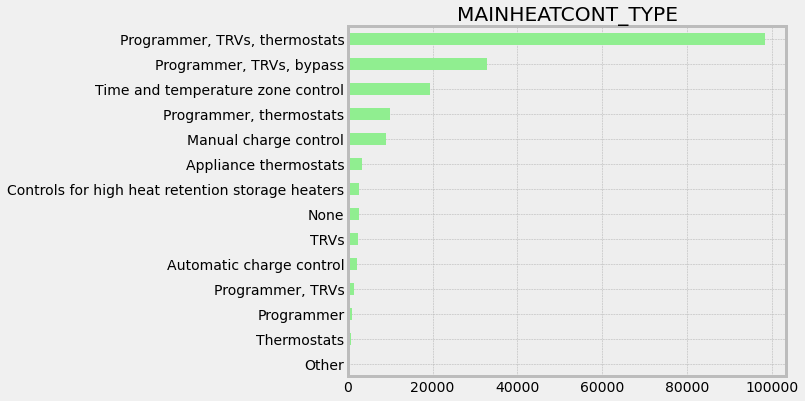

In [8]:
# popularity by wall types and insulation
_, ax = plt.subplots(1,1, figsize = (7,6))
_ = df1.groupby(feats_gr[0]).size().sort_values().plot(kind = 'barh', ax = ax, ylabel = '', color = 'lightgreen', title = 'MAINHEATCONT_TYPE')

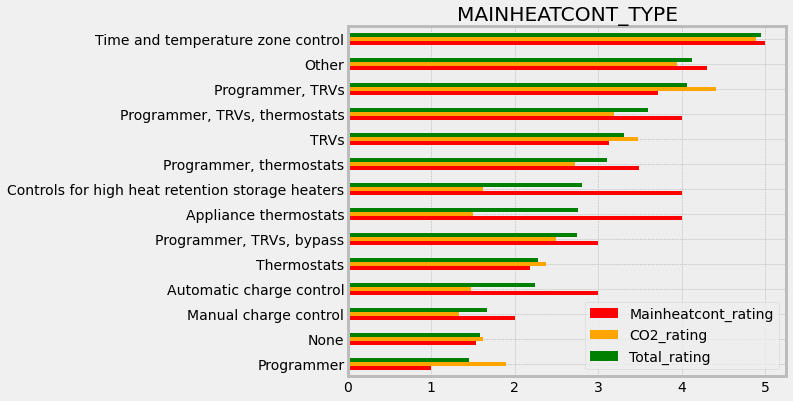

In [9]:
# ratings by wall types and insulation
_, ax = plt.subplots(1,1, figsize = (7,6))
_ = df1.groupby(feats_gr[0])[feats_ag].mean().sort_values('Total_rating').plot(kind = 'barh', ax = ax, ylabel = '', color = colors_list, title = 'MAINHEATCONT_TYPE')

#### 4. Correlations algorithm

In [10]:
# 1) create splittings
feats_gr = [
    'MAINHEATCONT_TYPE', 
    'Mainheatcont_rating'
]
feats_ag = [
    'Current energy efficiency rating',
    'Total current energy costs over 3 years (£)',
    'CO2 Emissions Current Per Floor Area (kg.CO2/m²/yr)'
]
           
df2 = df1.groupby(feats_gr)[feats_ag[-1]].agg([len,np.mean]).reset_index()
df2['group_name'] = df2[feats_gr].apply(lambda x: '_'.join([str(x1) for x1 in x]), axis = 1)
df2.loc[df2['len'] < 100, 'group_name'] = '_OTHER'
del df2['len']
del df2['mean']
print(df2.shape)

# merge with initial dataset
df1 = df1.merge(df2, how = 'left', on = feats_gr)

(26, 3)


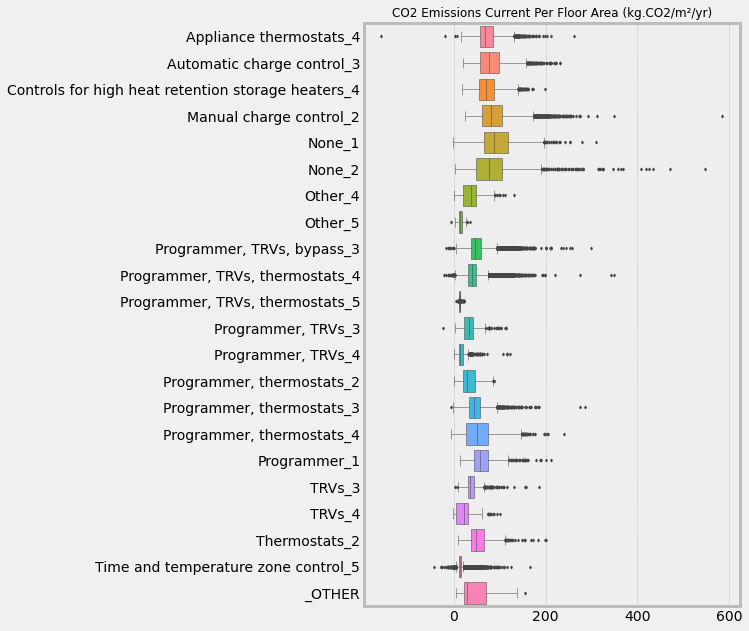

In [11]:
# 2) Plot boxplot to visually compare distributions
list_groups = sorted(df1[~df1.group_name.isnull()].group_name.unique())
feat = feats_ag[-1]
_, ax = plt.subplots(1,1, figsize = (6,10))
p = sns.boxplot(y=df1.group_name, x=df1[feat], ax = ax, order = list_groups, linewidth=0.5, saturation=1, fliersize = 2)
_ = p.set_title(feat, fontsize = 12)
_ = p.set_ylabel('')
_ = p.set_xlabel('')

In [12]:
# 3) Conduct ANOVA statistical test to have numerical value of similarity between these variables.
from scipy import stats
data = df1.groupby('group_name')[feat].agg(lambda x: list(x))
fvalue, pvalue = stats.f_oneway(*data)
fvalue, pvalue

(6016.729843987911, 0.0)

#### 5. Feature engineering for modelling part
- Calculate average values of features Current energy efficiency rating and Total current energy costs over 3 years (£) by the groups that described above.
- Create new features on the Property_UPRN level and replace the categorical features by that new numericals.
- We will use that features in the modelling part.

In [13]:
# Calculate average values of features Current energy efficiency rating and Total current energy costs over 3 years (£) by the groups.
pre = 'Mainheatcont_'
df2 = df1.groupby(feats_gr)[feats_ag[:-1]].agg([len, np.mean])
df2.columns = [pre+'eff_len',pre+'eff_mean',pre+'cost_len',pre+'cost_mean']
df2.reset_index(inplace = True)
df2['group_name'] = df2[feats_gr].apply(lambda x: '_'.join([str(x1) for x1 in x]), axis = 1)
df2.loc[df2[pre+'eff_len'] < 100, 'group_name'] = '_OTHER'
del df2[pre+'eff_len']
del df2[pre+'cost_len']

In [14]:
# Create new features on the Property_UPRN level and replace the categorical features by that new numericals
df2 = df2.groupby('group_name')[pre+'eff_mean',pre+'cost_mean'].mean().reset_index()
df1 = df1.merge(df2)
df3 = df1.groupby('Property_UPRN')[pre+'eff_mean',pre+'cost_mean'].mean().reset_index()

In [15]:
# We will use that features in the modelling part.
df3.to_csv('data/features/MAINHEATCONT_DESCRIPTION.csv', index = False, encoding = 'utf8', sep = '|')